In [ ]:
# Checking the directories
#!ls /d/KWS

In [ ]:
#!ls /d/KWS/data

In [ ]:
# Extracting the feaures in the feat_librosa folder
#!tar -xvf  '/d/KWS/data/feat_compressed.tar' -C '/d/KWS/data/'

In [ ]:
#!pip install matplotlib

In [2]:
# Importing the required Libraries
import torch
#import librosa
import os
import time
from tqdm import tqdm
import numpy as np
import pickle

##### Creating Train and Test Data 

In [3]:
# Creating Training and Testing data
# feat_shape = 512
# root = 'D:/KWS/data/'
# feat_folder = os.path.join(root, 'feat')

# lst = sorted(os.listdir(feat_folder))

# labels = [d for d in lst if os.path.isdir(os.path.join(feat_folder, d))
#           and d[0].isalpha()]

# train_samples = [0 for label in labels]
# test_samples = [0 for label in labels]

# #count train-test first
# for i, label in enumerate(labels):
#     record_list = sorted(os.listdir(os.path.join(feat_folder, label)))
#     for r, record_name in enumerate(record_list):
#         if hash(record_name) % 10 < 9:
#             train_samples[i] += 1
#         else:
#             test_samples[i] += 1

# for i, label in tqdm(enumerate(labels)):    
#     record_list = sorted(os.listdir(os.path.join(feat_folder, label)))
#     time_s = time.time()
#     train_count = 0
#     test_count = 0
#     train_data_class = np.full((train_samples[i], 1), i, dtype=np.uint8)
#     train_data_in = np.empty((train_samples[i], feat_shape, 100), dtype=np.float)
#     test_data_class = np.full((test_samples[i], 1), i, dtype=np.uint8)
#     test_data_in = np.empty((test_samples[i], feat_shape, 100), dtype=np.float)

#     for r, record_name in enumerate(record_list):
#         time_s = time.time()
#         record_pth = os.path.join(feat_folder, label, record_name)
        
#         record = np.squeeze(np.load(record_pth))      
#         if hash(record_name) % 10 < 9:
#             train_data_in[train_count, :] = record           
#             train_count += 1
                
#         else:
#             test_data_in[test_count, :] = record
#             test_count += 1

 
#     if i == 0:

#         train_data_in_all = train_data_in.copy()
#         train_data_class_all = train_data_class.copy()
#         test_data_in_all = test_data_in.copy()
#         test_data_class_all = test_data_class.copy()
#     else:

#         train_data_in_all = np.concatenate((train_data_in_all, train_data_in), axis=0)
#         train_data_class_all = np.concatenate((train_data_class_all, train_data_class), axis=0)    
#         test_data_in_all = np.concatenate((test_data_in_all, test_data_in), axis=0)
#         test_data_class_all = np.concatenate((test_data_class_all, test_data_class), axis=0)  

#     dur = time.time() - time_s
#     if i == 19: #THIS WAS INTENTIONALLY CUT SHORT FOR THE SAKE OF SPPED IN POC BUILDING
#         break
# print(train_data_in_all.shape)
# print(test_data_in_all.shape)
# print('done')

In [4]:
# train_data = []
# for i in range(len(train_data_in_all)):
#    train_data.append([train_data_in_all[i], train_data_class_all[i]])

# with open("D:/KWS/data/train_data.txt", "wb") as fp:   #Pickling
#     pickle.dump(train_data, fp)

In [5]:
# test_data = []
# for i in range(len(test_data_in_all)):
#    test_data.append([test_data_in_all[i], test_data_class_all[i]])

# with open("test_data.txt", "wb") as fp:   #Pickling
#     pickle.dump(test_data, fp)

In [6]:
# Loading the train and test data
with open("train_data.txt", "rb") as fp:   # Unpickling
    train_data = pickle.load(fp)
    
with open("test_data.txt", "rb") as fp:   # Unpickling
    test_data = pickle.load(fp)

In [7]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.array(train_data[0:2048]).size * np.array(train_data[0:2048]).itemsize

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Finish epoch  0 total loss 318.480 accuracy 0.876
Finish epoch  1 total loss 157.282 accuracy 0.934
Finish epoch  2 total loss 128.662 accuracy 0.946
Finish epoch  3 total loss 116.693 accuracy 0.950
Finish epoch  4 total loss 102.865 accuracy 0.956
Finish epoch  5 total loss 93.051 accuracy 0.960
Finish epoch  6 total loss 83.815 accuracy 0.964
Finish epoch  7 total loss 77.427 accuracy 0.966
Finish epoch  8 total loss 73.087 accuracy 0.968
Finish epoch  9 total loss 66.494 accuracy 0.971
Finish epoch  10 total loss 59.755 accuracy 0.974
Finish epoch  11 total loss 58.026 accuracy 0.974
Finish epoch  12 total loss 53.753 accuracy 0.976
Finish epoch  13 total loss 46.522 accuracy 0.980
Finish epoch  14 total loss 46.842 accuracy 0.980
Finish epoch  15 total loss 44.004 accuracy 0.981
Finish epoch  16 total loss 39.025 accuracy 0.984
Finish epoch  17 total loss 40.287 accuracy 0.983
Finish epoch  18 total loss 33.514 accuracy 0.986
Finish epoch  19 total loss 33.904 accuracy 0.985
Finis

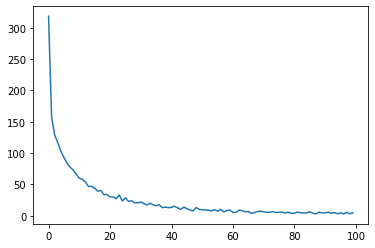

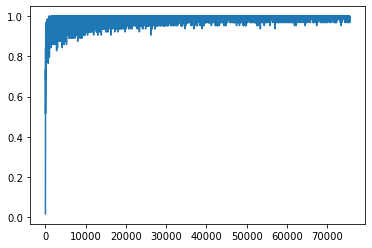

total loss 30.514 accuracy 0.958


In [8]:
class CNN(nn.Module):
    def __init__(self, lr, epochs, batch_size, num_classes= 20):
        super(CNN, self).__init__()
        self.epochs = epochs
        self.lr = lr
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.loss_history = []
        self.acc_history = []
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        
        self.conv1 = nn.Conv1d(512, 128, 9)
        self.bn1 = nn.BatchNorm1d(128)
        
        self.conv2 = nn.Conv1d(128, 128, 9)
        self.bn2 = nn.BatchNorm1d(128)
        
        self.conv3 = nn.Conv1d(128, 96, 9)
        self.bn3 = nn.BatchNorm1d(96)
        
        self.maxpool1 = nn.MaxPool1d(2)
        
        self.conv4 = nn.Conv1d(96, 64, 3)
        self.bn4 = nn.BatchNorm1d(64)
        
        self.maxpool2 = nn.MaxPool1d(2)

        input_dims = self.calc_input_dims()

        self.fc1 = nn.Linear(input_dims, self.num_classes)

        self.optimizer = optim.Adam(self.parameters(), lr=self.lr)

        self.loss = nn.CrossEntropyLoss()
        self.to(self.device)
        self.get_data()

    def calc_input_dims(self):
        batch_data = T.zeros((1, 512, 100))
        batch_data = self.conv1(batch_data)
        #batch_data = self.bn1(batch_data)
        batch_data = self.conv2(batch_data)
        #batch_data = self.bn2(batch_data)
        batch_data = self.conv3(batch_data)

        batch_data = self.maxpool1(batch_data)
        batch_data = self.conv4(batch_data)
        batch_data = self.maxpool2(batch_data)

        return int(np.prod(batch_data.size()))

    def forward(self, batch_data):
        batch_data = T.tensor(batch_data).to(self.device, dtype=torch.float )

        batch_data = self.conv1(batch_data)
        batch_data = self.bn1(batch_data)
        batch_data = F.relu(batch_data)

        batch_data = self.conv2(batch_data)
        batch_data = self.bn2(batch_data)
        batch_data = F.relu(batch_data)

        batch_data = self.conv3(batch_data)
        batch_data = self.bn3(batch_data)
        batch_data = F.relu(batch_data)

        batch_data = self.maxpool1(batch_data)

        batch_data = self.conv4(batch_data)
        batch_data = self.bn4(batch_data)
        batch_data = F.relu(batch_data)

        batch_data = self.maxpool2(batch_data)

        batch_data = batch_data.view(batch_data.size()[0], -1)

        classes = self.fc1(batch_data)

        return classes


    def get_data(self):
        self.train_data_loader = T.utils.data.DataLoader(train_data,
                                                    batch_size=self.batch_size,
                                                    shuffle=True,
                                                    num_workers=8)

        self.test_data_loader = T.utils.data.DataLoader(test_data,
                                                    batch_size=self.batch_size,
                                                    shuffle=True,
                                                    num_workers=8)

    def _train(self):
        self.train()
        for i in range(self.epochs):
            ep_loss = 0
            ep_acc = []
            for j, (input, label) in enumerate(self.train_data_loader):
                self.optimizer.zero_grad()
                label = label.to(self.device).type(torch.LongTensor)           
                prediction = self.forward(input)
            
                
                
                loss = self.loss(prediction, label.flatten().to(self.device))
                
                
                prediction = F.softmax(prediction, dim=1)
                
                classes = T.argmax(prediction, dim=1)
                
                wrong = T.where(classes != label.flatten().to(self.device),
                                T.tensor([1.]).to(self.device, dtype=torch.float),
                                T.tensor([0.]).to(self.device, dtype=torch.float))
                
                acc = 1 - T.sum(wrong) / self.batch_size

                ep_acc.append(acc.item())
                self.acc_history.append(acc.item())
                ep_loss += loss.item()
                loss.backward()
                self.optimizer.step()
            print('Finish epoch ', i, 'total loss %.3f' % ep_loss,
                    'accuracy %.3f' % np.mean(ep_acc))
            self.loss_history.append(ep_loss)

    def _test(self):
        self.eval()

        ep_loss = 0
        ep_acc = []
        for j, (input, label) in enumerate(self.test_data_loader):
            label = label.to(self.device).type(torch.LongTensor)            
            prediction = self.forward(input)                
            loss = self.loss(prediction, label.flatten().to(self.device))
            prediction = F.softmax(prediction, dim=1)
            classes = T.argmax(prediction, dim=1)
            wrong = T.where(classes != label.flatten().to(self.device),
                            T.tensor([1.]).to(self.device, dtype=torch.float),
                            T.tensor([0.]).to(self.device, dtype=torch.float))
            acc = 1 - T.sum(wrong) / self.batch_size

            ep_acc.append(acc.item())

            ep_loss += loss.item()

        print('total loss %.3f' % ep_loss,
                'accuracy %.3f' % np.mean(ep_acc))

# Running the model
if __name__ == '__main__':
    network = CNN(lr=0.001, batch_size= 64, epochs=100)
    network._train()
    plt.plot(network.loss_history)
    plt.show()
    plt.plot(network.acc_history)
    plt.show()
    network._test()

In [10]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in network.state_dict():
    print(param_tensor, "\t", network.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in network.optimizer.state_dict():
    print(var_name, "\t", network.optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([128, 512, 9])
conv1.bias 	 torch.Size([128])
bn1.weight 	 torch.Size([128])
bn1.bias 	 torch.Size([128])
bn1.running_mean 	 torch.Size([128])
bn1.running_var 	 torch.Size([128])
bn1.num_batches_tracked 	 torch.Size([])
conv2.weight 	 torch.Size([128, 128, 9])
conv2.bias 	 torch.Size([128])
bn2.weight 	 torch.Size([128])
bn2.bias 	 torch.Size([128])
bn2.running_mean 	 torch.Size([128])
bn2.running_var 	 torch.Size([128])
bn2.num_batches_tracked 	 torch.Size([])
conv3.weight 	 torch.Size([96, 128, 9])
conv3.bias 	 torch.Size([96])
bn3.weight 	 torch.Size([96])
bn3.bias 	 torch.Size([96])
bn3.running_mean 	 torch.Size([96])
bn3.running_var 	 torch.Size([96])
bn3.num_batches_tracked 	 torch.Size([])
conv4.weight 	 torch.Size([64, 96, 3])
conv4.bias 	 torch.Size([64])
bn4.weight 	 torch.Size([64])
bn4.bias 	 torch.Size([64])
bn4.running_mean 	 torch.Size([64])
bn4.running_var 	 torch.Size([64])
bn4.num_batches_tracked 	 torch.Size([])
fc1.weigh

In [13]:
PATH = 'CNN3_weights.pth'
torch.save(network.state_dict(), PATH)